In [1]:
require('deSolve')
#install.packages('deSolve')

Loading required package: deSolve
Warning message:
"package 'deSolve' was built under R version 3.6.2"

In [3]:
library("deSolve")

In [10]:
Vmax = 0.1
e = 1e-1
Kd = 2
R_infusion=0.0001
C = 0.0001 #Baseline starvation consumption of energy
K_transfer = 0.25

In [33]:
monod = function(S, Ks){
    return (S/(Ks+S))
}

clamp <- function(x, lower, upper){
    if (x < lower){return(lower)}
    else if (x>upper){return(upper)}
    else{return(x)}
    
}

f <- function(t, y, params){
    N = y[1]
    R = y[2]
    S = y[3]
    
    RN = R/(N+S)

    dNdt <- Vmax * monod(RN,Kd)*N - K_transfer*(1-monod(RN,Kd))*N
    dRdt <- -e*Vmax*monod(RN,Kd)*N -C*(N+S)+R_infusion
    dSdt <- K_transfer*(1-monod(RN,Kd))*N - 0.01*S
    
    dNdt <- clamp(dNdt, lower=-N, upper=99999)
    dRdt <- clamp(dRdt, lower=-R, upper=99999)
    dSdt <- clamp(dSdt, lower=-S, upper=99999)
    
    temp <- c(dNdt, dRdt, dSdt)
    L = list(temp)

    return(list(temp))
}

In [37]:
times <- seq(0,to=5000,by=0.1)
initials <- c(N=1, R=10, S=0)

In [38]:
out <- as.data.frame(ode(func=f,y=initials,times=times))#,parms=params))

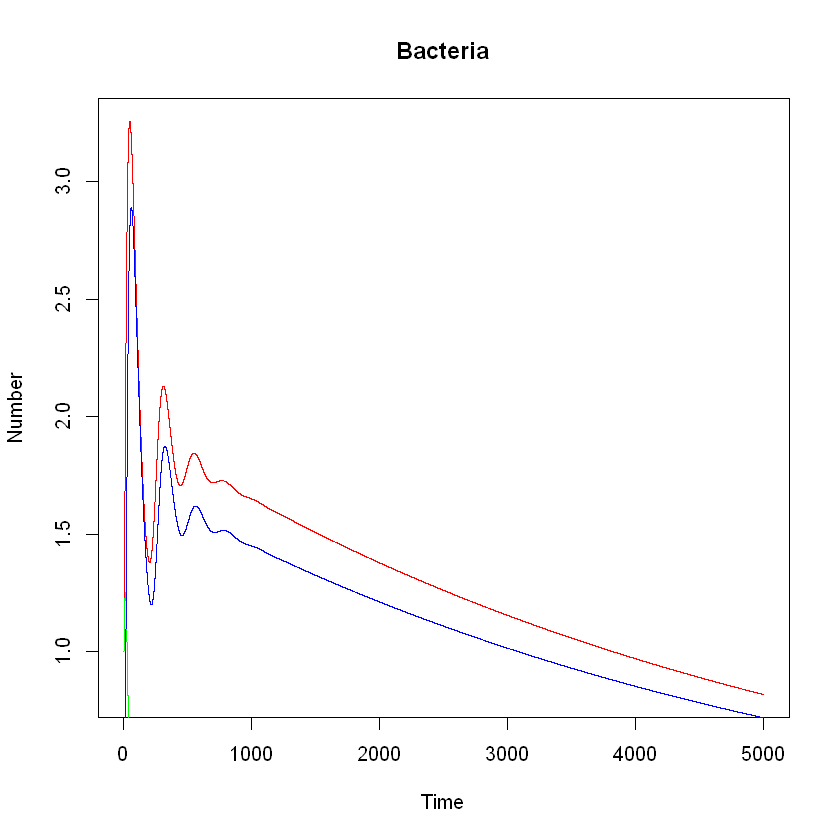

In [39]:
plot(times,out$S+out$N, type='l', col='red', main='Bacteria', xlab = 'Time', ylab = 'Number')
lines(times,out$N, type='l', col='green')
lines(times, out$S, type='l', col='blue')
legend(100,100, legend = c('Stationary', 'Growth'), col = c('blue', 'green'))

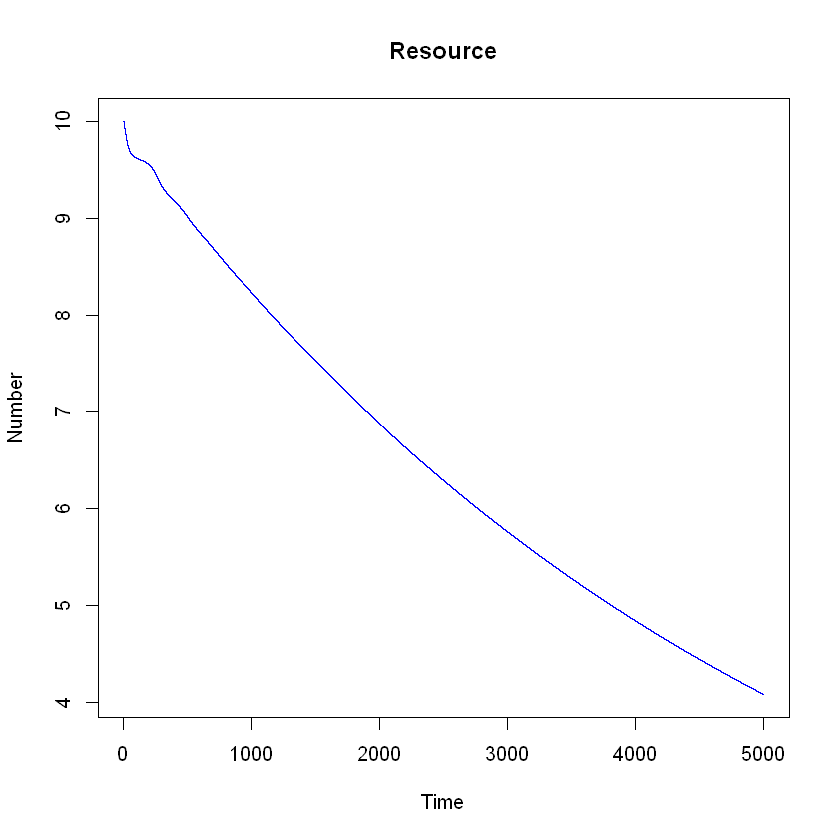

In [40]:
plot(times,out$R, type='l', col='blue', main='Resource', xlab = 'Time', ylab = 'Number')